In [62]:
import matplotlib.pyplot as plt
import openpyxl
import pandas as pd
import seaborn as sns

In [4]:
file_path = '/uoa/home/r04km21/sharedscratch/figure-practice/Kog1Pib2_IP/elife-68773-supp1-v2.xlsx'

In [54]:
df = pd.read_excel(file_path, header=1)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Kog1-N (20 min),Kog1-heat (20 min),Kog1-KCl (20 min),Kog1-H2O2 (20 min),Pib2-Glu (0 min),Pib2-Glu (2 hrs),Kog1-Glu_A (0 min),Kog1-Glu_A (20 min),Kog1-Glu_A (2 hrs),Kog1-Glu_B (0 min),Kog1-Glu_B (2 hrs),Kog1-Glu_B (6 hrs),Kog1-Glu_B (24 hrs),Frequency
0,NaN,TOR1,"TOR1 SGDID:S000003827, Chr X from 559416-56682...",524,683,538,576,235,273,415,378,383,339,325,266,230,13
1,NaN,KOG1,"KOG1 SGDID:S000001229, Chr VIII from 480672-47...",376,447,432,407,145,170,291,272,274,219,240,177,217,13
2,NaN,TCO89,"TCO89 SGDID:S000006101, Chr XVI from 205248-20...",124,147,137,161,105,91,153,169,147,124,97,100,99,13
3,NaN,RTG2,"RTG2 SGDID:S000003221, Chr VII from 27484-2571...",75,45,56,42,13,10,42,41,42,36,37,33,19,13
4,NaN,KSP1,"KSP1 SGDID:S000001124, Chr VIII from 271548-26...",63,41,85,93,50,45,91,86,82,62,52,46,27,13


In [55]:
# extract the colums needed
df = df[['Unnamed: 1', 'Pib2-Glu (0 min)', 'Kog1-Glu_A (0 min)', 'Kog1-Glu_B (0 min)']]
# change column name
df = df.rename(columns={'Unnamed: 1': 'Gene'})
df.set_index('Gene', inplace=True)
df

,Pib2-Glu (0 min),Kog1-Glu_A (0 min),Kog1-Glu_B (0 min)
Gene,,,
TOR1,235,415,339
KOG1,145,291,219
TCO89,105,153,124
RTG2,13,42,36
KSP1,50,91,62
...,...,...,...
GSY2,-,-,-
RSA4,-,-,-
APM1,-,-,-


In [56]:
# want to remove the rows with NaN
df = df.replace('-', pd.NA)
df = df.dropna(how='all')
# change NaN to 1
df = df.fillna(0)
df

/tmp/ipykernel_4181510/1429706224.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


,Pib2-Glu (0 min),Kog1-Glu_A (0 min),Kog1-Glu_B (0 min)
Gene,,,
TOR1,235,415,339
KOG1,145,291,219
TCO89,105,153,124
RTG2,13,42,36
KSP1,50,91,62
...,...,...,...
YSC84,0,0,7
TCD1,0,0,6
HST2,0,0,7


In [61]:
df['Kog1'] = (df['Kog1-Glu_A (0 min)'] + df['Kog1-Glu_B (0 min)']) / 2
# change 0 to 1
df = df.replace(0, 1)
df

,Pib2-Glu (0 min),Kog1-Glu_A (0 min),Kog1-Glu_B (0 min),Kog1
Gene,,,,
TOR1,235,415,339,377.0
KOG1,145,291,219,255.0
TCO89,105,153,124,138.5
RTG2,13,42,36,39.0
KSP1,50,91,62,76.5
...,...,...,...,...
YSC84,1,1,7,4.0
TCD1,1,1,6,3.5
HST2,1,1,7,4.0


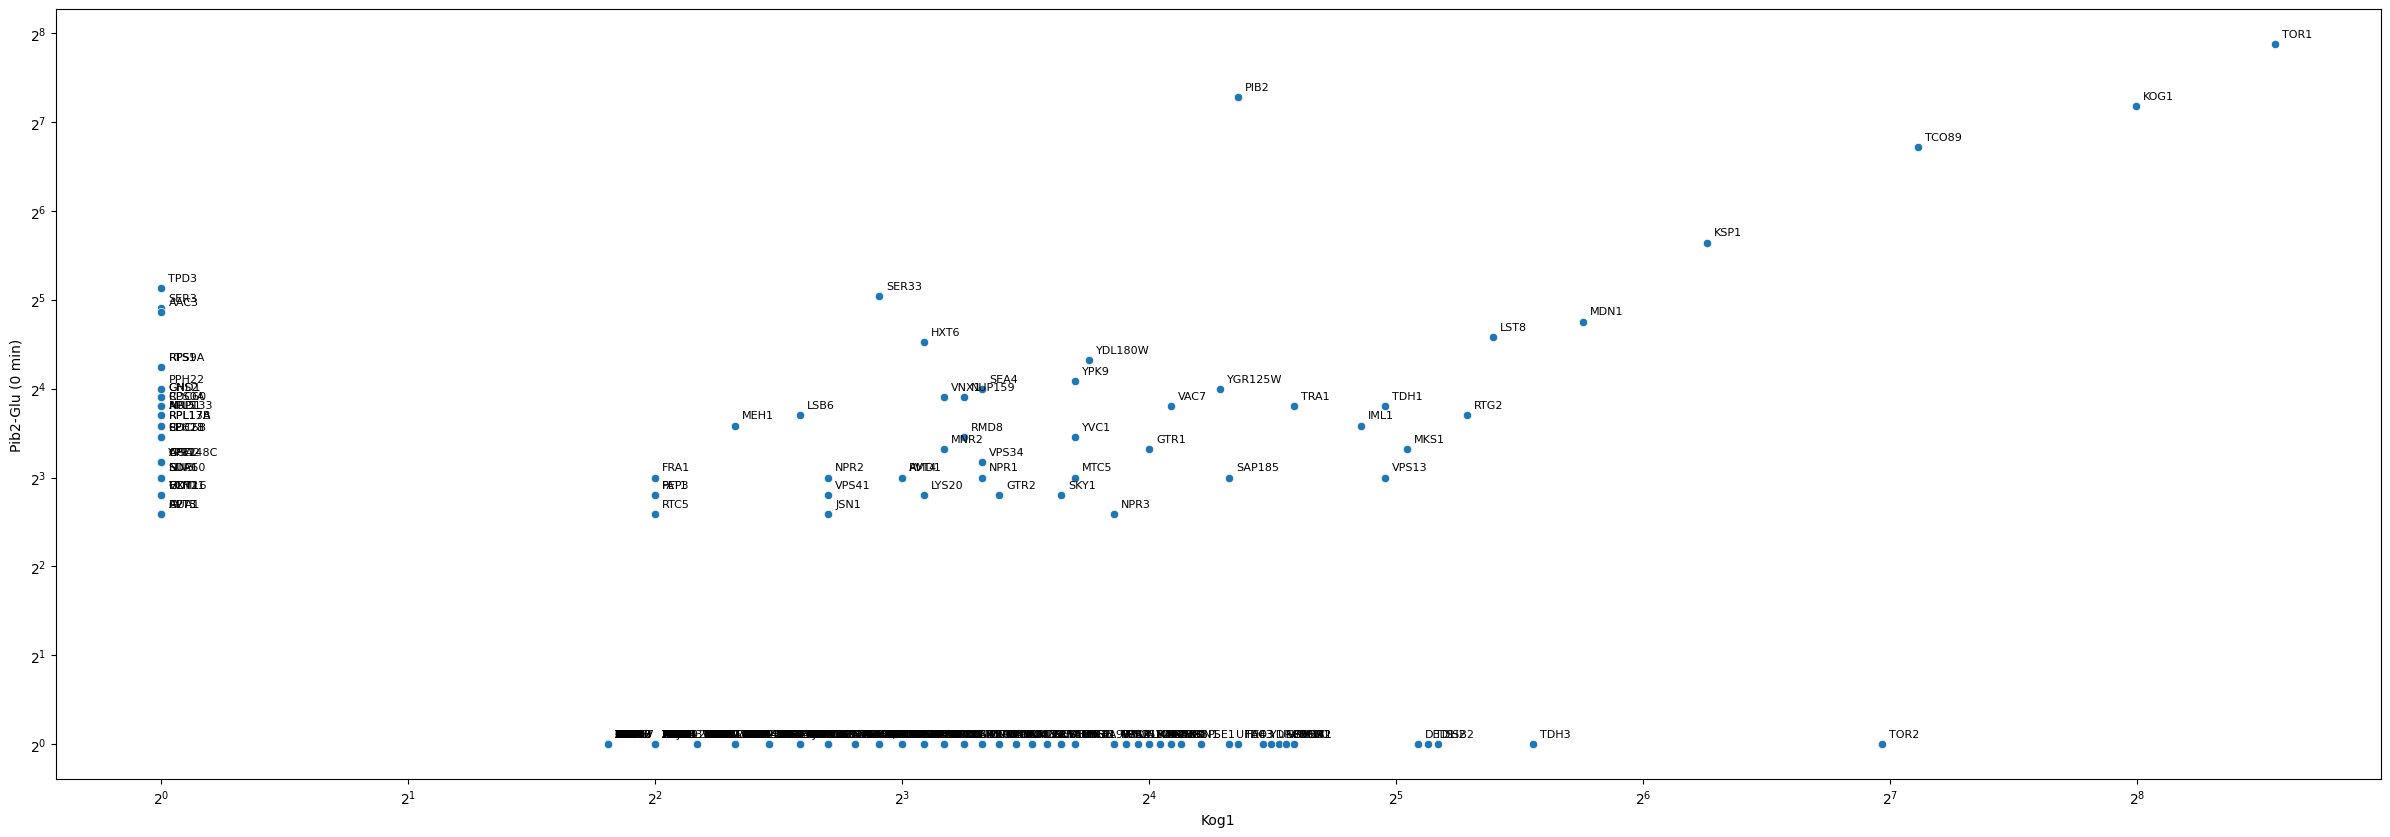

In [73]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.scatterplot(data=df, x='Kog1', y='Pib2-Glu (0 min)', ax=ax)

for idx, row in df.iterrows():
    ax.annotate(idx,  # idxはインデックス（遺伝子名）
                (row['Kog1'], row['Pib2-Glu (0 min)']),  # 点の座標
                xytext=(5, 5),  # テキストのオフセット
                textcoords='offset points',  # オフセットの単位
                fontsize=8)  # フォントサイズ

ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)



In [76]:
df[(df['Kog1'] < 1.5) & (df['Pib2-Glu (0 min)'] > 4)]

,Pib2-Glu (0 min),Kog1-Glu_A (0 min),Kog1-Glu_B (0 min),Kog1
Gene,,,,
RTS1,19,1,1,1.0
RPS9A,19,1,1,1.0
NUP133,13,1,1,1.0
CDC53,11,1,1,1.0
VTH2,7,1,1,1.0
PPH21,11,1,1,1.0
TPD3,35,1,1,1.0
APL5,13,1,1,1.0
RPL13B,12,1,1,1.0


In [80]:
df[(df['Kog1'] > 4) & (df['Pib2-Glu (0 min)'] > 4)]

,Pib2-Glu (0 min),Kog1-Glu_A (0 min),Kog1-Glu_B (0 min),Kog1
Gene,,,,
TOR1,235,415,339,377.0
KOG1,145,291,219,255.0
TCO89,105,153,124,138.5
RTG2,13,42,36,39.0
KSP1,50,91,62,76.5
LST8,24,40,44,42.0
IML1,12,27,31,29.0
MKS1,10,30,36,33.0
YGR125W,16,20,19,19.5


In [81]:
# AVT3 and AVT4 were in the list
# somehow, AVT3 was enriched only in Pib2, but AVT4 was enriched in both
# YVC1 and VNX1 were also in the list, but did not localized to SE by my screening